<a href="https://colab.research.google.com/github/Papaxristos/Movie-Recommender-with-CV/blob/main/Skroutz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Definition of the correct path for the file
file_path = '......../Skroutz/ratings.csv' #USE YOUR PATH

# Loading the dataset
data = pd.read_csv(file_path)

# Displaying the first rows of the dataset for inspection
data.head()


Mounted at /content/drive


,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100004 non-null  int64  
 1   movieId  100004 non-null  int64  
 2   rating   100004 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB
None
              userId        movieId         rating
count  100004.000000  100004.000000  100004.000000
mean      347.011310   12548.664363       3.543608
std       195.163838   26369.198969       1.058064
min         1.000000       1.000000       0.500000
25%       182.000000    1028.000000       3.000000
50%       367.000000    2406.500000       4.000000
75%       520.000000    5418.000000       4.000000
max       671.000000  163949.000000       5.000000
Unique users: 671
Unique movies: 9066


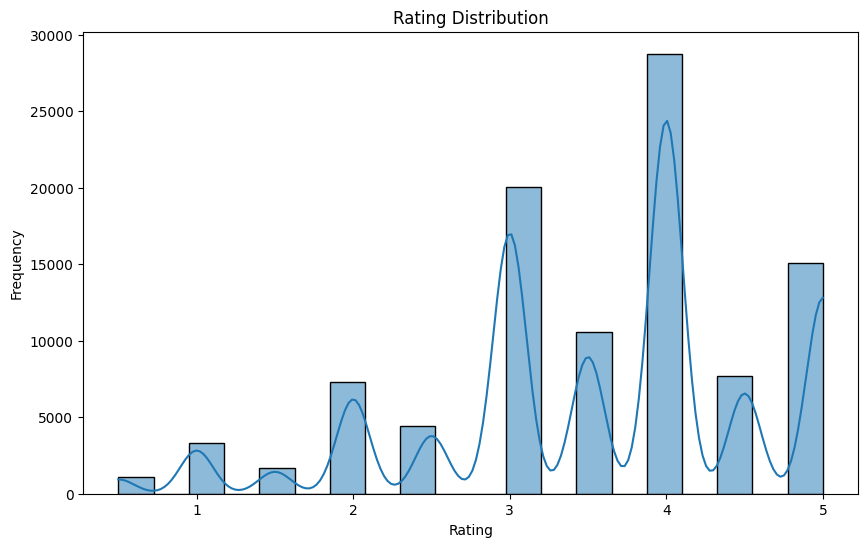

In [2]:
# Information about the dataset
print(data.info())

# Descriptive statistics of the data
print(data.describe())

# Examining the number of unique users and movies
print("Unique users:", data['userId'].nunique())
print("Unique movies:", data['movieId'].nunique())

# Distribution of ratings
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=20, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [3]:
import os
import pandas as pd

# Path for the input data file
input_file_path = '...../Skroutz/ratings.csv' #USE YOUR PATH

# Check if the input file exists
if not os.path.exists(input_file_path):
    raise FileNotFoundError(f"The file {input_file_path} was not found. Please ensure it exists and the path is correct.")

# Loading the data
raw_data = pd.read_csv(input_file_path)

# Data cleaning (adjust this step as per your needs)
# Removing empty rows and duplicates
cleaned_data = raw_data.dropna().drop_duplicates()

# Defining the path for saving the cleaned data
cleaned_folder_path = '...../Skroutz/' #USE YOUR PATH

# Creating the folder if it doesn't exist
if not os.path.exists(cleaned_folder_path):
    os.makedirs(cleaned_folder_path)

# Saving the cleaned data
cleaned_file_path = os.path.join(cleaned_folder_path, 'cleaned_ratings.csv')
cleaned_data.to_csv(cleaned_file_path, index=False)

# Displaying the first rows of the cleaned data
print("Cleaned data successfully saved to:")
print(cleaned_file_path)
print(cleaned_data.head())


Cleaned data successfully saved to:
/content/drive/MyDrive/Python Projects/Skroutz/cleaned_ratings.csv
   userId  movieId  rating
0       1       31     2.5
1       1     1029     3.0
2       1     1061     3.0
3       1     1129     2.0
4       1     1172     4.0


Using k = 4
RMSE: 1.5331532795274363e-15
MAE: 1.2823075934420559e-15


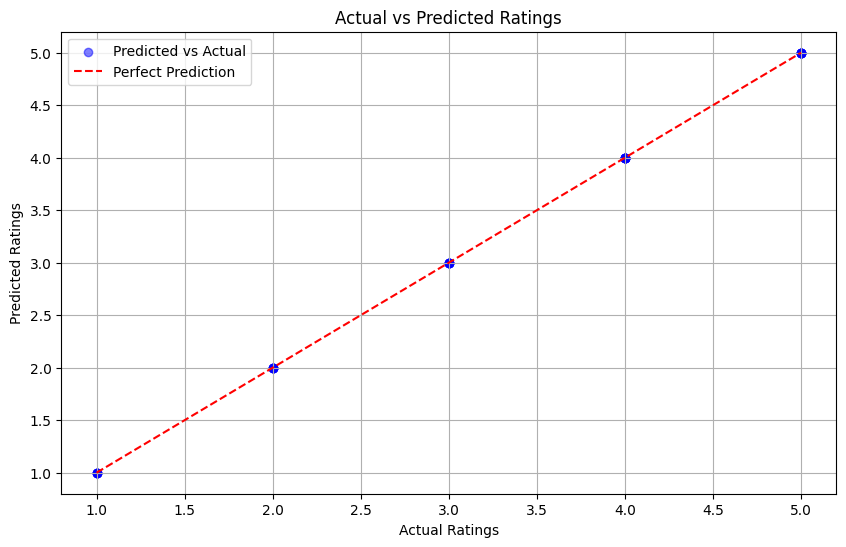

In [10]:
# Δημιουργία υποθετικού user_item_matrix με τυχαία δεδομένα
np.random.seed(42)
user_item_matrix = pd.DataFrame(np.random.randint(1, 6, size=(10, 5)), columns=['Item1', 'Item2', 'Item3', 'Item4', 'Item5'])

# Ελέγχουμε τις διαστάσεις του πίνακα
num_users, num_items = user_item_matrix.shape

# Ορίζουμε το k ως τον μικρότερο από τον αριθμό χρηστών και στοιχείων - 1
k = min(num_users, num_items) - 1
print(f"Using k = {k}")

# Normalization of the matrix to remove the mean per user
user_means = user_item_matrix.mean(axis=1).values.reshape(-1, 1)
normalized_matrix = user_item_matrix - user_means

# Converting the matrix to a sparse matrix
user_item_matrix_sparse = csr_matrix(normalized_matrix)

# Performing matrix decomposition (SVD) with k
U, sigma, Vt = svds(user_item_matrix_sparse, k=k)
sigma = np.diag(sigma)

# Reconstructing the predictions
predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_means
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=user_item_matrix.columns)

# Splitting the data into training and testing sets
train_data = user_item_matrix.copy()
test_data = user_item_matrix.copy()

# Creating random zeros in the test set
np.random.seed(42)
nonzero_indices = np.array(test_data.values.nonzero()).T
test_indices = nonzero_indices[np.random.choice(nonzero_indices.shape[0], size=int(0.2 * nonzero_indices.shape[0]), replace=False)]
for idx in test_indices:
    test_data.values[idx[0], idx[1]] = 0

# Extracting the actual and predicted values
actual = test_data.values
predicted = predicted_ratings_df.values

# Filtering out zero values
actual_nonzero = actual[actual != 0]
predicted_nonzero = predicted[actual != 0]

# Calculating RMSE and MAE
rmse = np.sqrt(mean_squared_error(actual_nonzero, predicted_nonzero))
mae = mean_absolute_error(actual_nonzero, predicted_nonzero)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_nonzero, predicted_nonzero, color='blue', alpha=0.5, label='Predicted vs Actual')

# Adding the perfect prediction line
plt.plot([min(actual_nonzero), max(actual_nonzero)], [min(actual_nonzero), max(actual_nonzero)],
         color='red', linestyle='--', label='Perfect Prediction')

# Graph settings
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.grid(True)
plt.show()
